# Computação científica com python

## Principais bibliotecas:
* Numpy
* Scipy
* Matplotlib

In [367]:
import numpy, scipy

### Criação de arrays e matrizes

In [368]:
array1d = numpy.array([1.2,2,2.5,3.5,4])
array2d = numpy.array([[1,2,3],
                      [1,2,3],
                      [1,2,3]])
mat2d = numpy.mat('1 2 3; 1 2 3; 1 2 3')
diagmat2d = numpy.mat(numpy.diagflat(numpy.random.rand(10)))

### Operações com arrays e matrizes

#### Mínimo, máximo, média, mediana...

In [369]:
print(array1d.min())
print(array1d.max())
print(array1d.mean())
print(numpy.median(array1d))

1.2
4.0
2.64
2.5


#### Operações de álgebra linear...

In [370]:
print(numpy.linalg.eigvals(diagmat2d))

[ 0.957  0.324  0.686  0.724  0.886  0.12   0.414  0.001  0.737  0.222]


In [371]:
print(numpy.linalg.eig(diagmat2d))

(array([ 0.957,  0.324,  0.686,  0.724,  0.886,  0.12 ,  0.414,  0.001,
        0.737,  0.222]), matrix([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]))


In [372]:
print(numpy.linalg.inv(diagmat2d)*diagmat2d)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


#### Matrizes são diferentes de arrays!

In [373]:
print(array2d*array2d)
print(mat2d*mat2d)

[[1 4 9]
 [1 4 9]
 [1 4 9]]
[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]


### Usando matplotlib

#### Caso genérico
$$ y = 0.3x^2 - 0.2x^1 + 0.1 $$

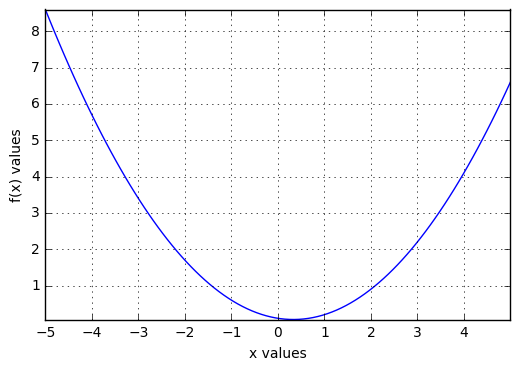

In [374]:
from matplotlib import pyplot
poly_y = numpy.poly1d(numpy.array([0.3, -0.2, 0.1]))
x = numpy.linspace(-5, 5, 100)
y = poly_y(x)
pyplot.xlabel('x values')
pyplot.ylabel('f(x) values')
xticks = numpy.arange(-5, 5, 1)
yticks = numpy.arange(0, 10, 1)
pyplot.xticks(xticks)
pyplot.yticks(yticks)
pyplot.grid(True)
pyplot.plot(x,y)
pyplot.show()

#### Plotando a derivada do polinômio acima

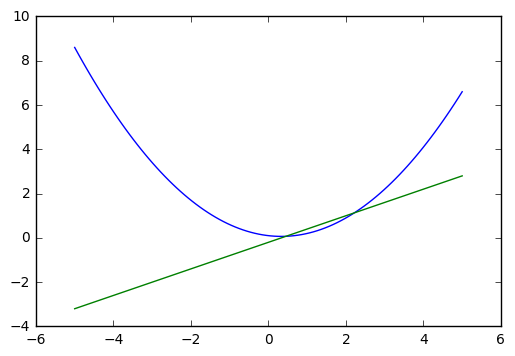

In [375]:
poly_y_deriv = poly_y.deriv()
y_deriv = poly_y_deriv(x)
pyplot.plot(x,y)
pyplot.plot(x,y_deriv)
pyplot.show()

#### Ajustando polinômios

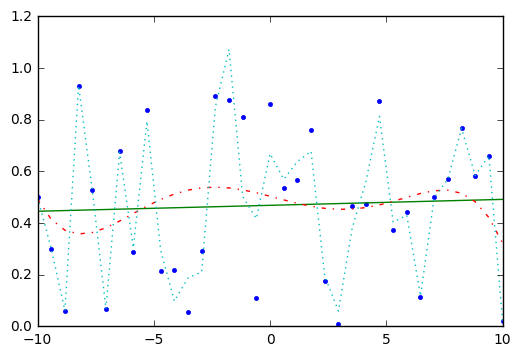

In [376]:
x = numpy.linspace(-10, 10, 35)
y = numpy.array(numpy.random.rand(35))

adjusted3 = numpy.polyfit(x, y, 1)
adjusted5 = numpy.polyfit(x, y, 5)
adjusted30 = numpy.polyfit(x, y, 30)
pyplot.plot(x,y, '.')
pyplot.plot(x,numpy.poly1d(adjusted3)(x), '-')
pyplot.plot(x,numpy.poly1d(adjusted5)(x), '-.')
pyplot.plot(x,numpy.poly1d(adjusted30)(x), ':')
pyplot.show()

### Alguns exemplos com Scipy

#### Processamento de imagens

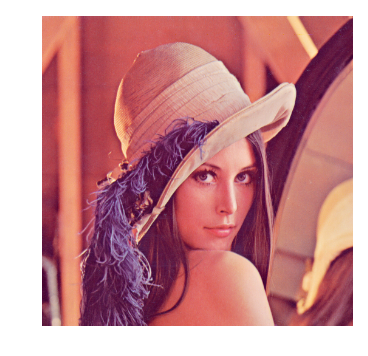

In [377]:
pyplot.axis('off')
from scipy import misc
face = scipy.misc.imread('lena.tif')
pyplot.imshow(face)
pyplot.show()

#### Exemplo de máscara

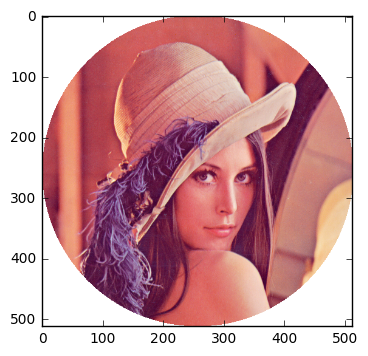

In [378]:
lx, ly, _ = face.shape
X, Y = numpy.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
face[mask] = 255
pyplot.imshow(face)
pyplot.show()

#### Cropping

/home/guilherme/Projetos/palestra-computacao-cientifica/venv/lib/python3.4/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


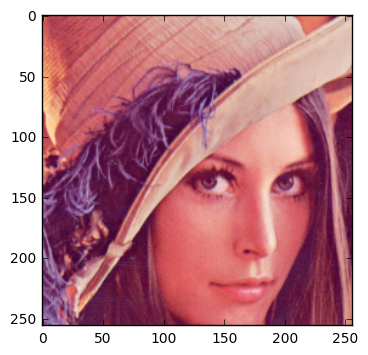

In [379]:
crop_face = face[lx / 4: - lx / 4, ly / 4: - ly / 4]
pyplot.imshow(crop_face)
pyplot.show()

#### Flipping and Rotating

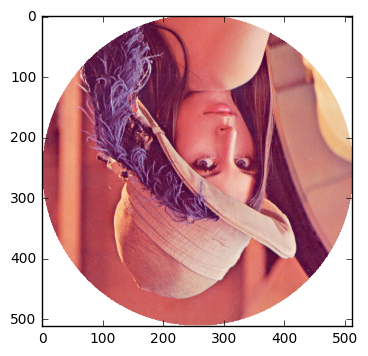

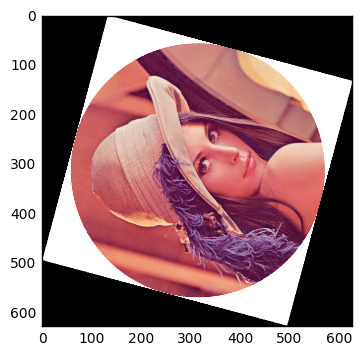

In [380]:
flip_ud_face = numpy.flipud(face)
pyplot.imshow(flip_ud_face)
pyplot.show()

import scipy.ndimage

rotated_face = scipy.ndimage.rotate(face, 75)
pyplot.imshow(rotated_face)
pyplot.show()

#### Aplicando filtros...

Filtro gaussiano:

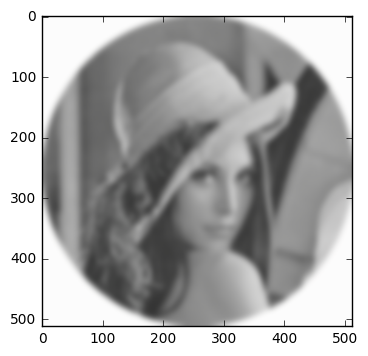

In [381]:
gaussian = scipy.ndimage.gaussian_filter(face, sigma=5)
pyplot.imshow(gaussian)
pyplot.show()

Remoção de ruído:

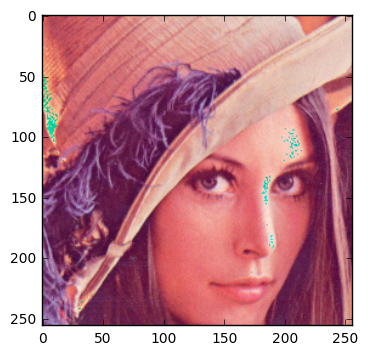

In [382]:
noisy = numpy.invert(crop_face + numpy.round((0.2 * crop_face.std() * numpy.random.random(crop_face.shape))).astype(int))
pyplot.imshow(noisy)
pyplot.show()

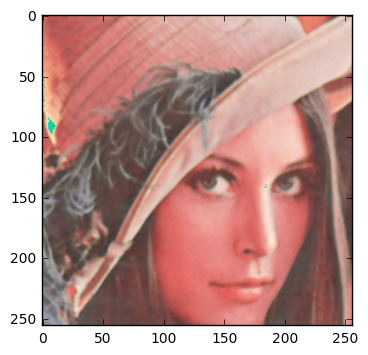

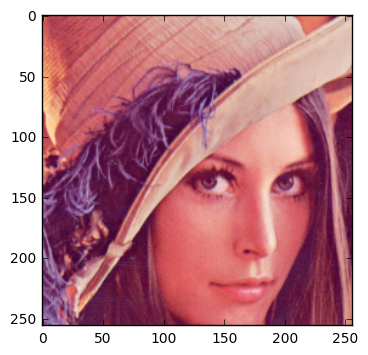

In [383]:
med_denoised = scipy.ndimage.median_filter(noisy, 3)
pyplot.imshow(med_denoised)
pyplot.show()
pyplot.imshow(crop_face)
pyplot.show()

Detecção de bordas:

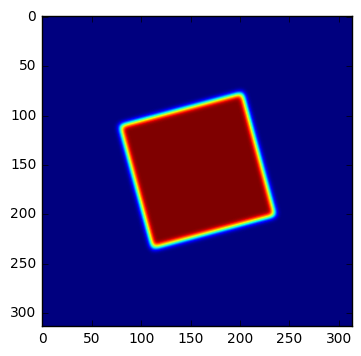

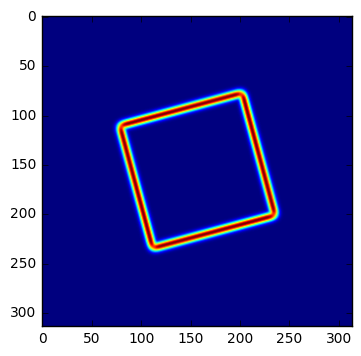

In [384]:
im = numpy.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = scipy.ndimage.rotate(im, 15, mode='constant')
im = scipy.ndimage.gaussian_filter(im, 3)

pyplot.imshow(im)
pyplot.show()

sx = scipy.ndimage.sobel(im, axis=0, mode='constant')
sy = scipy.ndimage.sobel(im, axis=1, mode='constant')
sob = numpy.hypot(sx, sy)

pyplot.imshow(sob)
pyplot.show()

## Lei de Fourier:
$$q = -k \frac{dT}{dx}$$

![SVG](./heat_flux.svg)

### Equação de calor:
$$\frac{\partial T}{\partial t} = \nabla^2 T$$

### Em uma dimensão:
$$\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2}$$

### Diferenças finitas:
$$\frac{T(x, t+1) }{k} = \frac{T(x+1, t) - 2T(x, t) + T(x-1, t)}{h^2}$$

![SVG](./Explicit_method-stencil.svg)

### Isolando T(x, t+1):
$$T(x, t+1) = \frac{k}{h^2}\left(T(x+1, t) - 2T(x, t) + T(x-1, t)\right) - T(x, t)$$

In [385]:
numpy.set_printoptions(precision=3)

#### Comprimento do domínio físico e sua quantidade de pontos

In [386]:
L = 1
nb_points = 50
h = float(L)/float(nb_points-1)
x_grid = [j*h for j in range(nb_points)]

#### Distância temporal entre cada ponto da solução atual e futura

In [387]:
k = 0.0001

In [388]:
r = k/(h*h)

#### Condição inicial:

In [389]:
T = [numpy.sin(5*j) for j in x_grid]

#### Gráfico da condinção inicial:

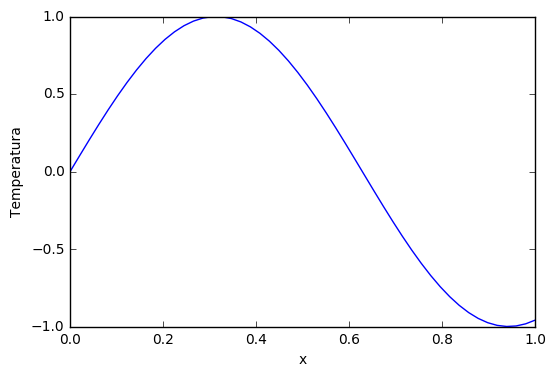

In [390]:
pyplot.ylim((-1, 1))
pyplot.xlabel('x')
pyplot.ylabel('Temperatura')
pyplot.plot(x_grid, T)
pyplot.show()

#### Mantendo as bordas (x=0 e x=1) a temperatura constante, partimos para a solução do sistema.

In [391]:
from matplotlib import animation, rc
from IPython.display import HTML

In [392]:
fig, ax = pyplot.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

In [301]:
def nextStep():
    global T
    T = [T[0]] + [(1-2*r)*Tj + r*T[i-1] + r*T[i+1] for i, Tj in enumerate(T) if (nb_points-1) > i > 0] + [T[nb_points-1]]

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    global T
    nextStep()
    line.set_data(x_grid, T)
    return (line,)

In [393]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1500, interval=10, blit=True)

HTML(anim.to_html5_video())

#### Resultado final (depois de mais 1500 iterações):

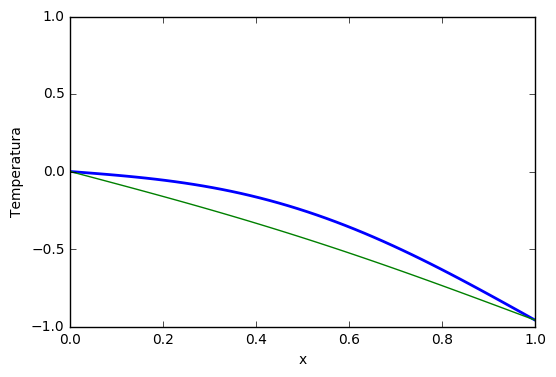

In [394]:
timesteps = 1500
while(timesteps > 0):
    nextStep()
    timesteps = timesteps - 1

pyplot.ylim((-1, 1))
pyplot.xlabel('x')
pyplot.ylabel('Temperatura')
pyplot.plot(x_grid, T)
pyplot.show()

### Reescrevendo a equação de diferenças finitas de forma implícita:
$$ -rT(x-1, t+1) + (1+2r)T(x, t+1) - rT(x+1, t+1) = T(x,t) $$
Em forma matricial:
$$
\begin{bmatrix}
    1 & 0 & 0 & 0 & \dots & 0 \\
    -r & (1+2r) & -r & 0 & \dots & 0 \\
    0 & -r & (1+2r) & -r & \dots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & 0 & \dots  & 1
\end{bmatrix}
\begin{bmatrix}
T(1, t+1) \\
T(2, t+1) \\
T(3, t+1) \\
\vdots \\
T(n, t+1)
\end{bmatrix}
=
\begin{bmatrix}
T(1, t) \\
T(2, t) \\
T(3, t) \\
\vdots \\
T(n, t)
\end{bmatrix}
$$

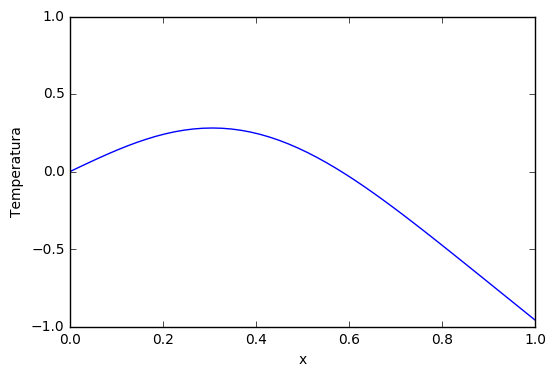

In [396]:
A = numpy.mat(numpy.diagflat([-r for j in range(nb_points-2)] + [0], -1) + \
numpy.diagflat([1] + [(1+2*r) for j in range(nb_points-2)] + [1]) + \
numpy.diagflat([0] + [-r for j in range(nb_points-2)], 1))

T = numpy.mat([numpy.sin(5*j) for j in x_grid]).T
x_grid = numpy.array(x_grid)

timesteps = 500
while(timesteps > 0):
    T = numpy.linalg.solve(A, T)
    timesteps = timesteps-1

pyplot.ylim((-1, 1))
pyplot.xlabel('x')
pyplot.ylabel('Temperatura')
pyplot.plot(x_grid, T)
pyplot.show()

In [82]:
import numpy
from matplotlib import pyplot
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = pyplot.subplots()

left_x_lim = -20
right_x_lim = 20

ax.set_xlim((left_x_lim , right_x_lim))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

timesteps = 800

nb_points = 350
x_grid = numpy.linspace(left_x_lim, right_x_lim, nb_points)
W_old = numpy.sinc(x_grid)
W = numpy.sinc(x_grid)

def nextStep():
    global W
    global W_old
    W_new = [W[1] - W_old[0]] + [W[i+1] + W[i-1] - W_old[i] for i, Tj in enumerate(W) if (nb_points-1) > i > 0] + [W[nb_points-2] - W_old[nb_points-1]]
    W_old = W
    W = W_new

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    global W
    nextStep()
    line.set_data(x_grid, W)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=timesteps, interval=50, blit=True)

HTML(anim.to_html5_video())